<a href="https://colab.research.google.com/github/CharleneLimKH/python-mini-projects/blob/main/covid_19_cases__geoRegion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
from google.colab import files
uploaded = files.upload()

Saving COVID19Cases_geoRegion.csv to COVID19Cases_geoRegion.csv


In [7]:
#filepath = "COVID19Cases_geoRegion.csv"
df = pd.read_table("COVID19Cases_geoRegion.csv", sep= ",") 
df.head(10)

,geoRegion,datum,entries,sumTotal,timeframe_7d,timeframe_14d,timeframe_28d,timeframe_phase2,timeframe_phase2b,timeframe_phase3,...,inzsum14d,sumdelta7d,inzdelta7d,type,type_variant,version,datum_unit,entries_letzter_stand,entries_neu_gemeldet,entries_diff_last
0,CH,2020-02-24,1,1,False,False,False,False,False,False,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-11-01_06-10-18,day,1,0,23783
1,CH,2020-02-25,1,2,False,False,False,False,False,False,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-11-01_06-10-18,day,1,0,23783
2,CH,2020-02-26,10,12,False,False,False,False,False,False,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-11-01_06-10-18,day,10,0,23783
3,CH,2020-02-27,10,22,False,False,False,False,False,False,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-11-01_06-10-18,day,10,0,23783
4,CH,2020-02-28,10,32,False,False,False,False,False,False,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-11-01_06-10-18,day,10,0,23783
5,CH,2020-02-29,13,45,False,False,False,False,False,False,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-11-01_06-10-18,day,13,0,23783
6,CH,2020-03-01,12,57,False,False,False,False,False,False,...,NaN,NaN,NaN,COVID19Cases,NaN,2022-11-01_06-10-18,day,12,0,23783
7,CH,2020-03-02,30,87,False,False,False,False,False,False,...,NaN,29.0,0.33,COVID19Cases,NaN,2022-11-01_06-10-18,day,30,0,23783
8,CH,2020-03-03,33,120,False,False,False,False,False,False,...,NaN,32.0,0.37,COVID19Cases,NaN,2022-11-01_06-10-18,day,33,0,23783
9,CH,2020-03-04,61,181,False,False,False,False,False,False,...,NaN,51.0,0.58,COVID19Cases,NaN,2022-11-01_06-10-18,day,61,0,23783


In [13]:
df2=df.rename(columns={'datum':'date','entries':'cnt', "sumTotal":"cumsum"})
df2[df2['geoRegion'] == "CH"]
df2 = df2[['date', 'cnt', 'cumsum']]
#df2['logcumsum']=np.log(df2['cumsum'])
#df.rename("datum":"date")
df2


,date,cnt,cumsum
0,2020-02-24,1,1
1,2020-02-25,1,2
2,2020-02-26,10,12
3,2020-02-27,10,22
4,2020-02-28,10,32
...,...,...,...
28473,2022-10-28,606,757719
28474,2022-10-29,421,758140
28475,2022-10-30,288,758428
28476,2022-10-31,491,758919


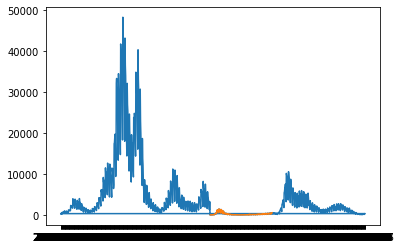

In [26]:
import matplotlib.pyplot as plt
t0=500
t1=1500
plt.plot(df2.date[t0:t1], df2.cnt[t0:t1])
plt.plot(df2.date[0:200], df2.cnt[0:200])

In [24]:
df2.date[0:100]

0     2020-02-24
1     2020-02-25
2     2020-02-26
3     2020-02-27
4     2020-02-28
         ...    
95    2020-05-29
96    2020-05-30
97    2020-05-31
98    2020-06-01
99    2020-06-02
Name: date, Length: 100, dtype: object

In [30]:
df3=df2[(df2.date>'2020-03-01')&(df2.date<'2020-04-30')]
df3=df3.reset_index()

In [32]:
df3

,index,date,cnt,cumsum
0,7,2020-03-02,30,87
1,8,2020-03-03,33,120
2,9,2020-03-04,61,181
3,10,2020-03-05,62,243
4,11,2020-03-06,73,316
...,...,...,...,...
1706,27557,2020-04-25,15,3335
1707,27558,2020-04-26,9,3344
1708,27559,2020-04-27,21,3365
1709,27560,2020-04-28,23,3388


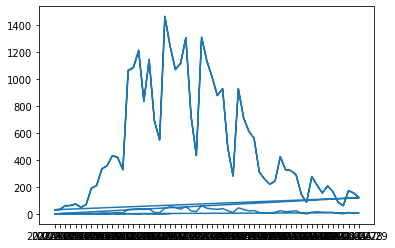

In [31]:
plt.plot(df3.date[0:200], df3.cnt[0:200])